<a href="https://colab.research.google.com/github/shahpranshu27/HandsOn_ML/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# /content/drive/MyDrive/Colab Notebooks/Zomato data .csv

## Zomato Data Analysis Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Convert the data type of column - rate

Here, the ratings will be converted from 4.1/5 to just 4.1 i.e. we have removes the denominator '/'

In [4]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

df['rate'] = df['rate'].apply(handleRate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'types of restaurants')

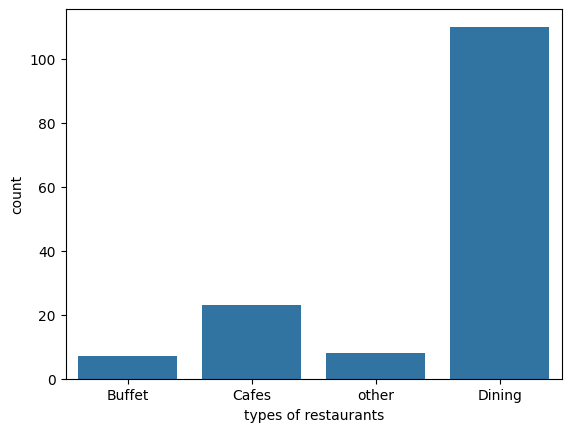

In [7]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('types of restaurants')

Thus we can conclude that majority of customers prefer dining restaurants

Text(0, 0.5, 'votes')

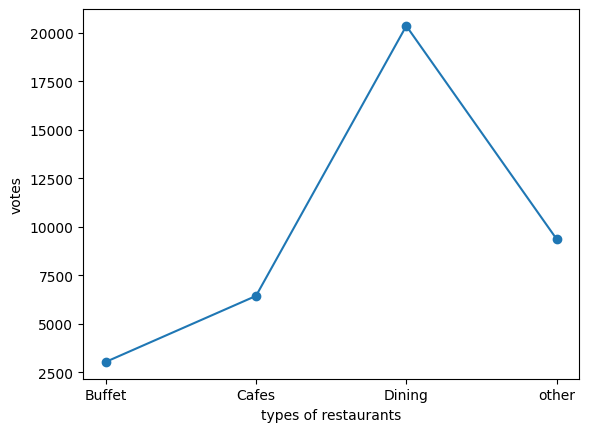

In [10]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame(grouped_data)
plt.plot(result, marker='o')
plt.xlabel('types of restaurants')
plt.ylabel('votes')

We can conclude that dining restaurants recieved maximum votes.

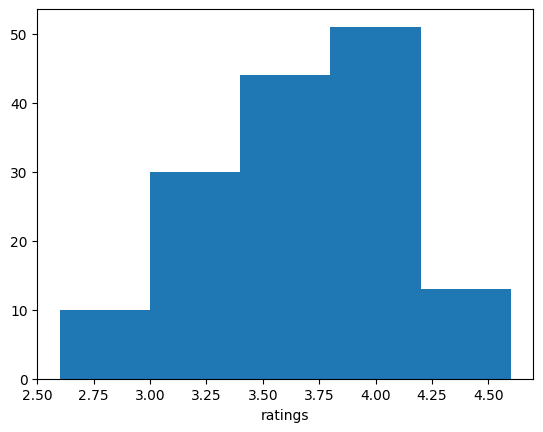

In [12]:
plt.hist(df['rate'], bins=5)
plt.xlabel('ratings')
plt.show()

Maximum restaurants recieved 3.5 - 4 ratings

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

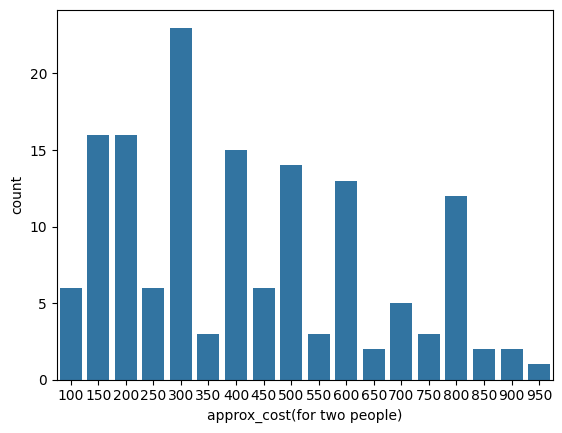

In [13]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Thus, avg cost for 2 people approx is Rs. 300

<Axes: xlabel='online_order', ylabel='rate'>

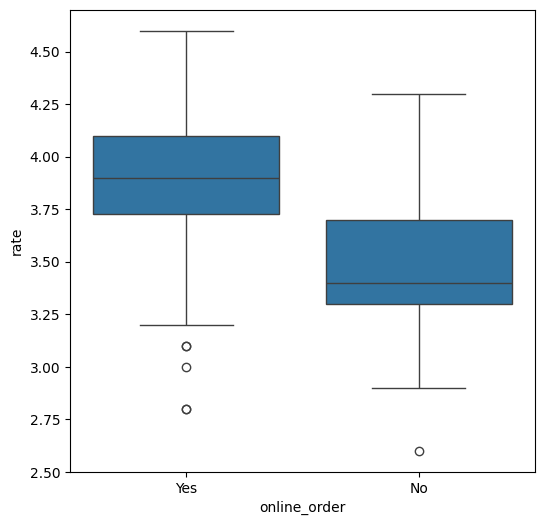

In [14]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['online_order'], y='rate', data=df)

Thus we can conclude that, orders that were recieved online has higher ratings than orders that were offline.

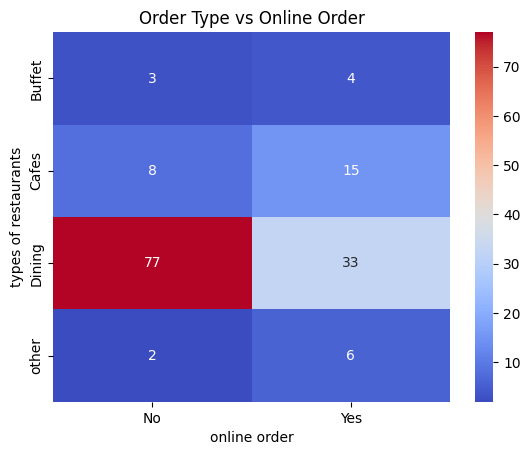

In [15]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Order Type vs Online Order')
plt.xlabel('online order')
plt.ylabel('types of restaurants')
plt.show()

Thus we can say that mostly people who order from dining, usually prefer to order offline by visiting the restaurant. And from cafes, people prefer to order online.